# <center>Prediction using Supervised ML</center> 
## <center>Name : E.B.Adhirath

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

## Dataset

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
X = data["Hours"].values
y = data["Scores"].values

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [6]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

## Plotting the Data

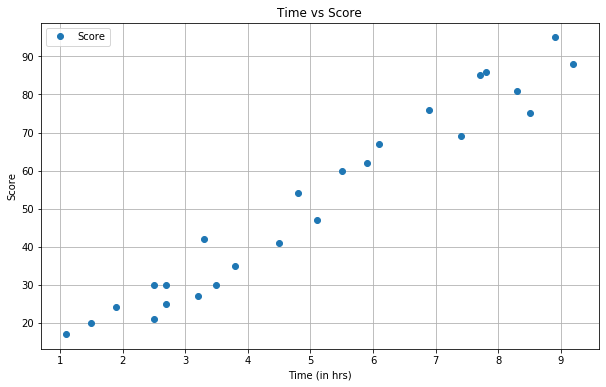

In [8]:
plt.figure(figsize=(10,6))
plt.plot(X, y, "o")
plt.title("Time vs Score")
plt.xlabel("Time (in hrs)")
plt.ylabel("Score")
plt.legend(["Score"])
plt.grid()
plt.show()

## Splitting the data for Training and Testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

## Training the Linear Regression Model

In [10]:
regressor = SVR(kernel="linear",epsilon=5, C=2)

In [11]:
regressor.fit(X_train, y_train.ravel())

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=5, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

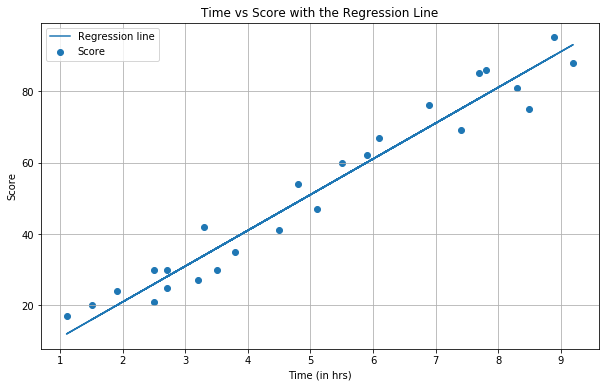

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, regressor.predict(X))
plt.title("Time vs Score with the Regression Line")
plt.xlabel("Time (in hrs)")
plt.ylabel("Score")
plt.grid()
plt.legend(["Regression line", "Score"])
plt.show()

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
compare = pd.DataFrame({'Actual Score': y_test.reshape(len(y_test)) , "Predicted Score": y_pred})
compare

,Actual Score,Predicted Score
0,69,74.999998
1,67,62.000000
2,27,33.000003
3,85,77.999998
4,54,49.000001


## Evaluation Metrics

In [15]:
print("Training Accuracy : {:.6f}".format(regressor.score(X_train, y_train)))
print("Testing Accuracy  : {:.6f}".format(regressor.score(X_test, y_test)))

Training Accuracy : 0.956668
Testing Accuracy  : 0.909004


In [16]:
print("Mean Absolute Error : {:.6f}".format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error : 5.800000


In [17]:
print("Mean Squared Error : {:.6f}".format(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 34.200006


In [18]:
print("Max Error : {:.6f}".format(max_error(y_test, y_pred)))

Max Error : 7.000002


## Predicted score if a student studies for 9.25 hrs/ day

In [19]:
time = np.array(9.25).reshape(-1,1)

In [20]:
print("Score of the student if he studies for 9.25 hrs/day : {}".format(regressor.predict(time)[0]))

Score of the student if he studies for 9.25 hrs/day : 93.49999650617518
